In [ ]:
from google.colab import files
uploaded = files.upload()
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
video_list = pd.read_csv("USvideos.csv")
total = len(video_list.columns)
for i in range(total):
  null = video_list[video_list.columns[i]].isnull().sum()
  print("Null in " + video_list.columns[i] + " : " + str(null))

1. <br><br/>
Null in video_id : 0 <br><br/>
Null in trending_date : 0 <br><br/>
Null in title : 0 <br><br/>
Null in channel_title : 0 <br><br/>
Null in category_id : 0 <br><br/>
Null in publish_time : 0 <br><br/>
Null in tags : 0 <br><br/>
Null in views : 0 <br><br/>
Null in likes : 0 <br><br/>
Null in dislikes : 0 <br><br/>
Null in comment_count : 0 <br><br/>
Null in thumbnail_link : 0 <br><br/>
Null in comments_disabled : 0 <br><br/>
Null in ratings_disabled : 0 <br><br/>
Null in video_error_or_removed : 0 <br><br/>
Null in description : 570 <br><br/>

In [ ]:
video_list['publish_time']= pd.to_datetime(video_list['publish_time'])
video_list['publish_time'].dtypes
print(video_list['publish_time'])
group = video_list.groupby(video_list["publish_time"].apply(lambda x:x.year)).agg({'likes':'mean','dislikes':'mean','views':'mean','comment_count':'mean'})
print(group)

2. <br><br/>
Average of likes : 47935.029824 <br><br/>
Average of dislikes : 2991.047277 <br><br/>
Average of views : 1.313908e+06 <br><br/>
Average of comment_count : 5780.985232 <br><br/>

In [ ]:
a = video_list[(video_list['publish_time'] >= pd.to_datetime('2017-01-01 00:00:00+00:00')) & (video_list['publish_time']<pd.to_datetime('2018-01-01 00:00:00+00:00'))]
sns.boxplot(x=a['publish_time'].apply(lambda x:x.month), y=a['dislikes'], showfliers=False)

3. <br><br/>
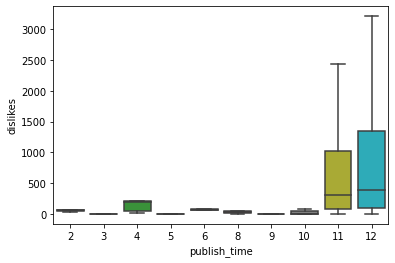

In [ ]:
b = video_list[(video_list['publish_time']>=pd.to_datetime('2017-01-01 00:00:00+00:00')) & (video_list['publish_time'] <pd.to_datetime('2019-01-01 00:00:00+00:00'))]
sns.barplot(x=b['category_id'],y=b['views'])

4. <br><br/>
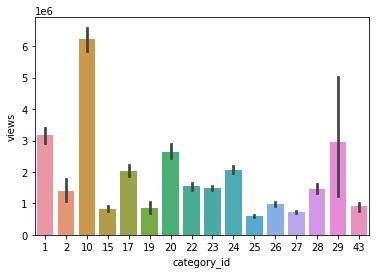

In [ ]:
video_list = video_list[['category_id','views','likes','dislikes','comment_count','comments_disabled','ratings_disabled','video_error_or_removed']]
mask1 = video_list[video_list['category_id'] == 1]
mask1 = mask1.sample(n=50)
mask2 = video_list[video_list['category_id'] == 2]
mask2 = mask2.sample(n=50)
mask3 = video_list[video_list['category_id'] == 10]
mask3 = mask3.sample(n=50)
mask4 = video_list[video_list['category_id'] == 15]
mask4 = mask4.sample(n=50)
mask5 = video_list[video_list['category_id'] == 17]
mask5 = mask5.sample(n=50)
mask6 = video_list[video_list['category_id'] == 19]
mask6 = mask6.sample(n=50)
mask7 = video_list[video_list['category_id'] == 20]
mask7 = mask7.sample(n=50)
mask8 = video_list[video_list['category_id'] == 22]
mask8 = mask8.sample(n=50)
mask9 = video_list[video_list['category_id'] == 23]
mask9 = mask9.sample(n=50)
mask10 = video_list[video_list['category_id'] == 24]
mask10 = mask10.sample(n=50)
mask11 = video_list[video_list['category_id'] == 25]
mask11 = mask11.sample(n=50)
mask12 = video_list[video_list['category_id'] == 26]
mask12 = mask12.sample(n=50)
mask13 = video_list[video_list['category_id'] == 27]
mask13 = mask13.sample(n=50)
mask14 = video_list[video_list['category_id'] == 28]
mask14 = mask14.sample(n=50)
mask15 = video_list[video_list['category_id'] == 29]
mask15 = mask15.sample(n=50)
mask16 = video_list[video_list['category_id'] == 43]
mask16 = mask16.sample(n=50)
dataorg = pd.concat([mask1,mask2,mask3,mask4,mask5,mask6,mask7,mask8,mask9,mask10,mask11,mask12,mask13,mask14,mask15,mask16])
data = dataorg[['views','likes','dislikes','comment_count','comments_disabled','ratings_disabled','video_error_or_removed']]
data.comments_disabled = data.comments_disabled.replace({True: 1, False: 0})
data.ratings_disabled = data.ratings_disabled.replace({True: 1, False: 0})
data.video_error_or_removed = data.video_error_or_removed.replace({True: 1, False: 0})

In [ ]:
from sklearn.preprocessing import StandardScaler
def myPCA(data, dataorg):
    X_scaled = StandardScaler().fit_transform(data)
    features = X_scaled.T
    cov_matrix = np.cov(features)
    values, vectors = np.linalg.eig(cov_matrix)

    explained_variances = []
    for i in range(len(values)):
        explained_variances.append(values[i] / np.sum(values))

    projected_1 = X_scaled.dot(vectors.T[0])
    projected_2 = X_scaled.dot(vectors.T[1])

    res = pd.DataFrame(projected_1, columns=['PC1'])
    res['PC2'] = projected_2
    res['Y'] = pd.DataFrame(dataorg['category_id'].to_numpy())

    plt.figure(figsize=(20,10))
    output = sns.scatterplot(res['PC1'], res['PC2'], hue=res['Y'], palette='deep')
    return output
myPCA(data=data, dataorg=dataorg)

5. <br><br/>
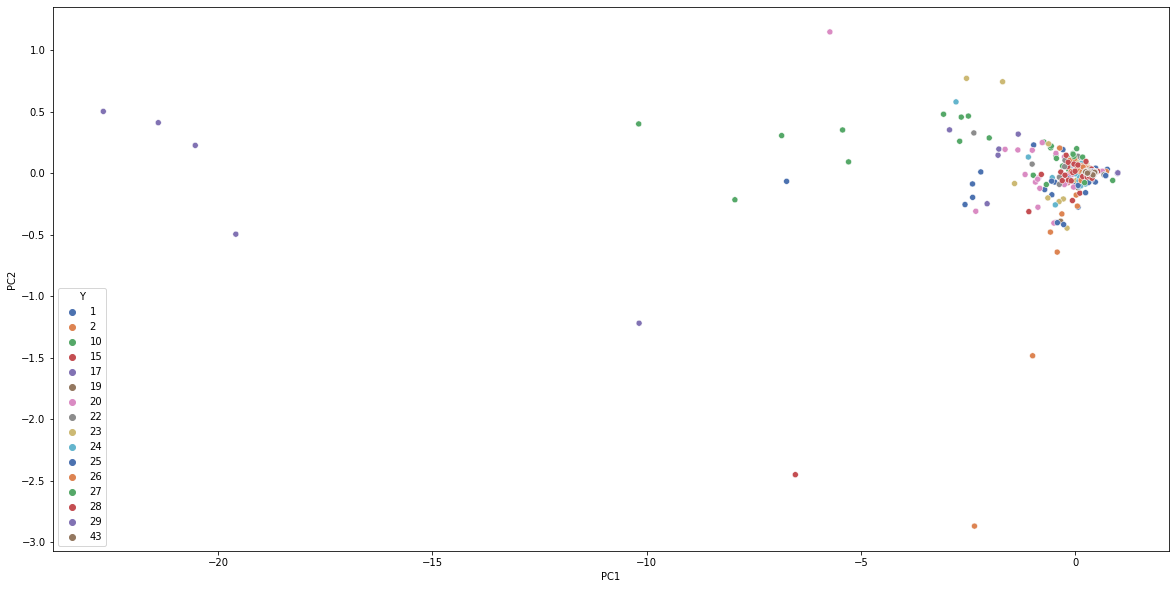

In [ ]:
from wordcloud import WordCloud
import nltk
nltk.download("punkt")

In [ ]:
text = video_list['title']
textall = []
for i in range(100):
  textall += nltk.word_tokenize(text[i])
string = (" ").join(textall)
cloud = WordCloud().generate(string)
cloud.to_file('output.png')

6. <br><br/>
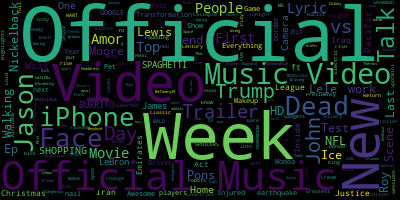